In [1]:
!pip install langgraph langsmith


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 580.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.9/296.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.7/407.7 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00


In [2]:
!pip install langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00


In [4]:
from google.colab import userdata
Groq_Api_Key  = userdata.get('Groq_Api_Key')
Langsmith_Api_Key = userdata.get('Langsmith_Api_Key')


In [6]:
import os
os.environ["GROQ_API_KEY"] = Groq_Api_Key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_Api_KeyT"] = Langsmith_Api_Key
os.environ["LANGCHAIN_Project"] = "Course_Langgraph "

In [9]:
from langchain_groq import ChatGroq
llm  = ChatGroq(groq_api_key=Groq_Api_Key , model = "Gemma2-9b-It")

Chatbot Using Langgraph

In [10]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [12]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  message:Annotated[list , add_messages]

In [14]:
graph_builder = StateGraph(State)

In [15]:
def chatbot(state:State):
  return{'message': llm.invoke(state['message'])}

In [16]:
graph_builder.add_node('Chatbot' , chatbot)


In [17]:
graph_builder.add_edge(START , 'Chatbot')
graph_builder.add_edge('Chatbot' , END)

In [18]:
graph = graph_builder.compile()

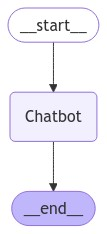

In [19]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

Ask Question To The Bot Outside Its Training Data

In [20]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ['quit' , 'exit' , 'q']:
    print("GoodBye")
    break

  for event in graph.stream({'message':('user', user_input)}):
    print(event.values())
    for values in event.values():
      print(values['message'])
      print('Assitant:' , values['message'].content)

User: hey


/usr/local/lib/python3.10/dist-packages/langsmith/client.py:354: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


dict_values([{'message': AIMessage(content='Hey there! 👋 What can I do for you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 4.5e-07, 'queue_time': 0.012866269999999999, 'total_time': 0.029091359}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-ad264968-d3bf-44c7-af7d-30bdeb54ee6a-0', usage_metadata={'input_tokens': 10, 'output_tokens': 16, 'total_tokens': 26})}])
content='Hey there! 👋 What can I do for you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 4.5e-07, 'queue_time': 0.012866269999999999, 'total_time': 0.029091359}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-ad26

User: what is generative ai


dict_values([{'message': AIMessage(content="Generative AI is a type of artificial intelligence that focuses on creating new content. \n\nThink of it like this: instead of just analyzing existing data, generative AI learns the patterns and structures within that data and then uses that knowledge to generate something completely new. \n\nHere's a breakdown:\n\n**What it does:**\n\n* **Creates text:**  Writing stories, poems, articles, dialogue, and even code.\n* **Generates images:**  Producing realistic photos, artwork, and illustrations.\n* **Composes music:**  Crafting original melodies, harmonies, and entire musical pieces.\n* **Designs objects:**  Coming up with new product designs, architectural blueprints, or even 3D models.\n* **Summarizes and translates text:**  Condensing large amounts of information or converting it into different languages.\n\n**How it works:**\n\nGenerative AI models are typically trained on massive datasets of existing content. They learn the underlying rul

User: exit
GoodBye
